In [1]:
import cv2
import matplotlib.pyplot as plt
import deepdish as dd
import numpy as np

def imshow(im, vmin=0, vmax=1):
    plt.imshow(im[:,:,::-1], vmax=vmax, vmin=vmin)
    plt.show()

frames = dd.io.load("data/cable.h5")

580


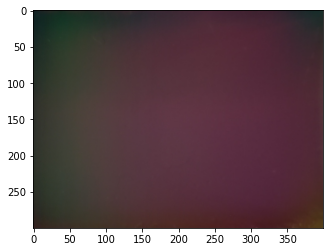

In [2]:
print(len(frames))
frame0 = frames[0]
frame = frames[200]
imshow(frame)

6.8977594


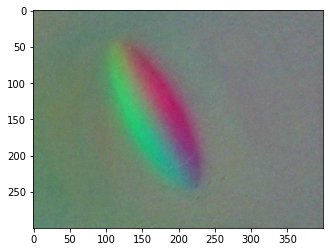

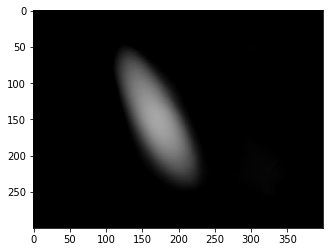

In [3]:

from util.reconstruction import Class_3D


sensor_id = "W00"
model_id = "RGB"
model_fn = f"models/LUT_{sensor_id}_{model_id}.pkl"
c3d = Class_3D(model_fn=model_fn, features_type=model_id)


frame0 = frames[0]
# frame = frames[200]
# frame = frames[375]
# frame = frames[455]

frame = frames[280]
# frame = frames[460]
diff = (frame * 1.0 - frame0) / 255. + 0.5
diff_img = (diff - 0.5) * 4 + 0.5
depth, gx, gy = c3d.infer(diff * 255.0, display=False)
# depth[depth<0.3] = 0.3
# depth -= 0.5

imshow(diff_img)

# plt.imshow(depth, cmap='gray', vmax=4, vmin=0.5)
plt.imshow(depth, cmap='gray', vmax=10, vmin=1)
# plt.show()

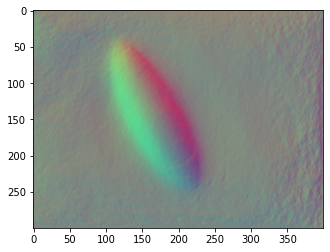

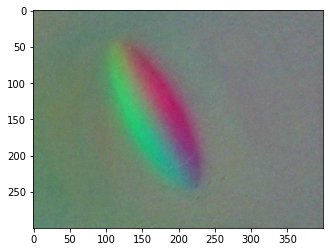

In [4]:
gy, gx = np.gradient(depth)
# plt.imshow(gx, cmap='gray', vmin=-0.3, vmax=0.3)
# plt.imshow(gy, cmap='gray', vmin=-0.3, vmax=0.3)

rendered_img = np.zeros(frame.shape)
theta_x = np.arctan(gx*5)
theta_y = np.arctan(gy*5)

k = 0.35
rendered_img[:,:,1] = np.cos(np.pi / 2 - theta_x) * k * 1.2
rendered_img[:,:,0] = np.cos(np.pi / 2 + theta_y) * k / 2
rendered_img[:,:,2] = np.cos(np.pi / 2 - theta_y) * k * 1
    
# rendered_img[:,:,1] = np.maximum(rendered_img[:,:,1], 0)
# rendered_img[:,:,2] = np.maximum(rendered_img[:,:,2], 0)
# rendered_img[:,:,0] = np.maximum(rendered_img[:,:,0], 0)
rendered_img[:,:,1] += 0.03
imshow(rendered_img + 0.5)
plt.figure()
G = np.zeros_like(diff_img) + 0.5
G[:,:,1] = diff_img[:,:,1]
imshow(diff_img)

B = np.zeros_like(diff_img) + 0.5
B[:,:,0] = diff_img[:,:,0]

R = np.zeros_like(diff_img) + 0.5
R[:,:,2] = diff_img[:,:,2]


# plt.imshow(R[:,:,2], cmap='gray')

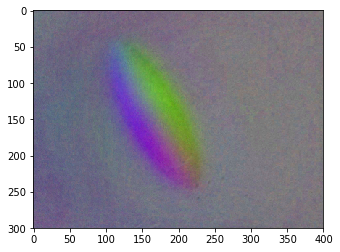

In [161]:
imshow(diff_img[:,:,[1,2,0]])

In [5]:
from scipy.spatial.transform import Rotation as R

r = R.random(random_state=1).as_matrix()
# diff_img_flatten = np.reshape(diff_img, [-1, 3])
diff_img_flatten = diff_img[0,0,:]
print(diff_img_flatten)
diff_img_flatten = diff_img_flatten.dot(r)
# diff_img_flatten = r.apply(diff_img_flatten)

# diff_img_random = diff_img_flatten.reshape(diff_img.shape)

r
# imshow(diff_img_random/255.)
# imshow(diff_img)
diff_img_flatten

[0.40588235 0.45294118 0.45294118]


array([-0.10928243, -0.71647982,  0.22308275])

In [532]:
# # edgeMap = imutils.auto_canny((diff_img*255).astype(np.uint8))
# gray = (np.mean(diff_img, axis=-1)*255).astype(np.uint8)
# edges = cv2.Canny(gray, 1,200)
# plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
# plt.figure()
# plt.imshow(edges)

In [349]:
a = np.array([1,2,3,4,5])
np.maximum(a, 3)

array([3, 3, 3, 4, 5])

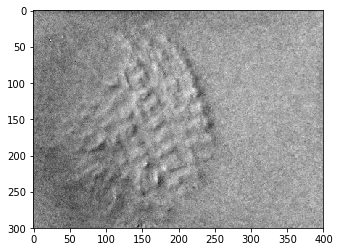

In [517]:
# intensity = (gx ** 2 + gy ** 2) ** 0.5
intensity = np.sum(np.abs(diff), axis=-1)
plt.imshow(intensity, cmap='gray')

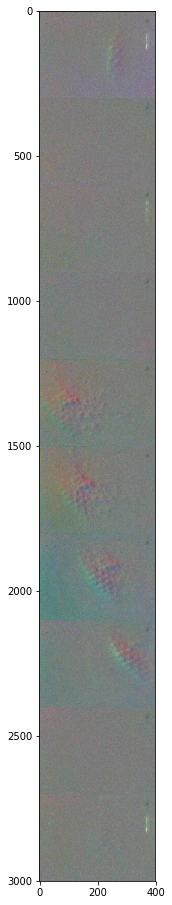

(200, 400, 3)


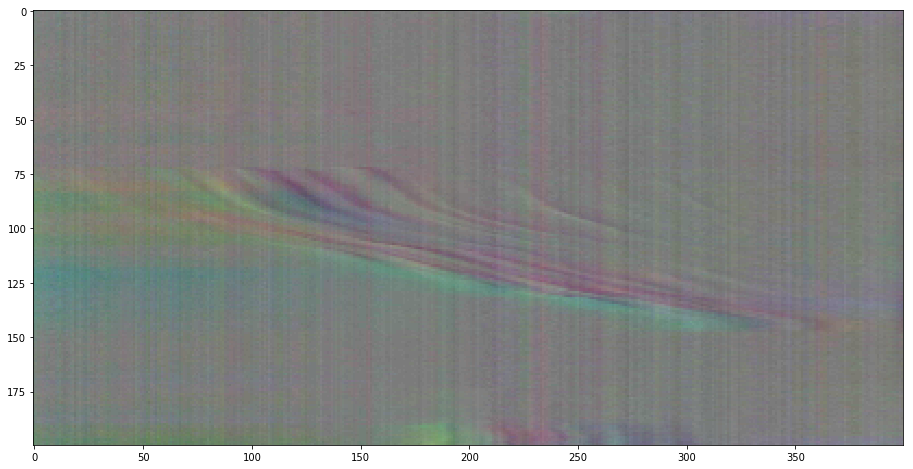

In [5]:
frame_temperal_list = []
snapshot = []
for i in range(400,600):
    frame = frames[i]

    diff = (frame * 1.0 - frame0) / 255. + 0.5
    diff_img = (diff - 0.5) * 4 + 0.5

    frame_temperal_list.append(diff_img[150])
    
    if i % 20 == 0 :
#         imshow(diff_img)
        snapshot.append(diff_img)
#     cv2.imshow('diff', diff_img)
#     cv2.waitKey(1)

snapshot = np.vstack(snapshot)
plt.figure(figsize=(40,16))
imshow(snapshot)

frame_temperal = np.array(frame_temperal_list)
print(frame_temperal.shape)
plt.figure(figsize=(20,8))
imshow(frame_temperal)

(200, 400, 3)


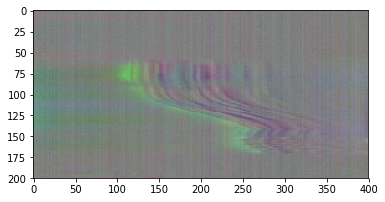

(200, 400, 3)


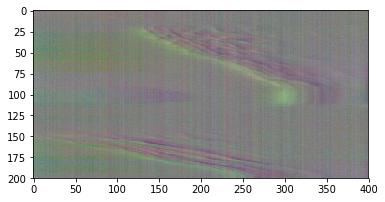

(200, 400, 3)


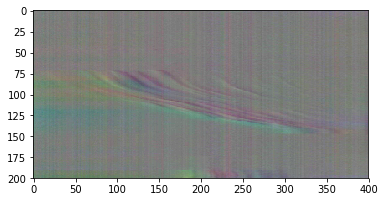

(200, 400, 3)


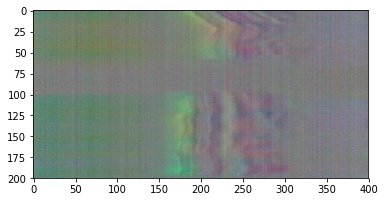

(200, 400, 3)


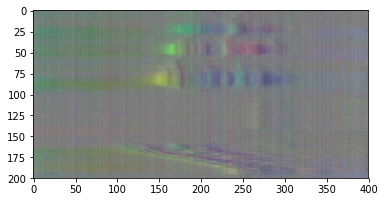

In [3]:
frame0 = frames[0]
for _ in range(5):
    frame_temperal_list = []
    for i in range(_*200, (_+1)*200):
        frame = frames[i]

        diff = (frame * 1.0 - frame0) / 255. + 0.5
        diff_img = (diff - 0.5) * 4 + 0.5

        frame_temperal_list.append(diff_img[150])
        cv2.imshow('diff', diff_img)
        cv2.waitKey(1)

    frame_temperal = np.array(frame_temperal_list)
    print(frame_temperal.shape)
    plt.figure()
    imshow(frame_temperal)

In [ ]:
img

In [ ]:
# import cv2
# import matplotlib.pyplot as plt

# cap = cv2.VideoCapture('./data/fabric.mov')

# frames = []

# while True:
#     ret, frame = cap.read()
#     if ret is False:
#         break
#     frames.append(frame)

# for i in range(len(frames)):
#     cv2.imshow('frame', frames[i])
#     c = cv2.waitKey(1)
#     if c == ord('q'):
#         break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


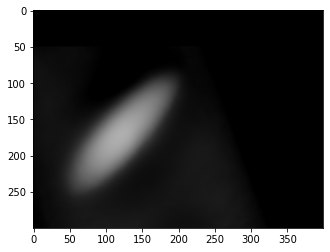

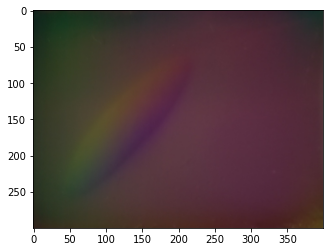

In [13]:
import imutils
angle = -70
# angle = 5

mask = np.ones(diff_img.shape)

depth_max = 10
depth_img = np.zeros_like(diff_img, dtype=np.float32)
for c in range(3):
    depth_img[:,:,c] = depth / depth_max
# plt.imshow(depth, cmap='gray', vmax=10, vmin=1)

rotated = imutils.rotate(depth_img, angle)
# rotated = imutils.rotate(diff_img, angle)

mask = imutils.rotate(mask, angle)
# rotated = imutils.rotate(diff_img, angle)
shifted = imutils.translate(rotated, -70, 50)
mask = imutils.translate(mask, -70, 50)
mask_raw = 1 - mask[:,:,0]
# shifted[shifted<0.1] = 0.5

# blur = cv2.GaussianBlur(shifted, (85,85),0)
plt.figure()
imshow(shifted)

plt.figure()
plt.imshow(mask, cmap='gray', vmin=0, vmax=1)

frame1 = frames[460]
imshow(frame1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


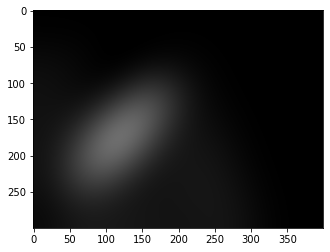

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


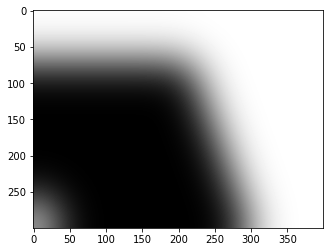

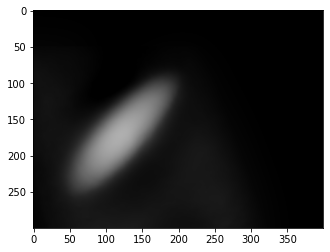

In [14]:

from scipy.interpolate import griddata

def dilate(img, ksize=5):
    kernel = np.ones((ksize, ksize), np.uint8)
    return cv2.dilate(img, kernel, iterations=1)

def interpolate_mask(img, mask):
    # mask = (soft_mask > 0.5).astype(np.uint8) * 255
    # cv2.imshow("mask_hard", mask)
    # pixel around markers
    mask_around = (dilate(mask, ksize=3) > 0) & (mask != 1)
    # mask_around = mask == 0
    mask_around = mask_around.astype(np.uint8)
    cv2.imshow("mask_around", mask_around * 255)

    x, y = np.arange(img.shape[0]), np.arange(img.shape[1])
    yy, xx = np.meshgrid(y, x)

    # mask_zero = mask == 0
    mask_zero = mask_around == 1
    mask_x = xx[mask_zero]
    mask_y = yy[mask_zero]
    points = np.vstack([mask_x, mask_y]).T
    values = img[mask_x, mask_y]
    markers_points = np.vstack([xx[mask != 0], yy[mask != 0]]).T
    method = "nearest"
    # method = "linear"
    # method = "cubic"
    x_interp = griddata(points, values, markers_points, method=method)
    x_interp[x_interp != x_interp] = 0.0
    ret = img.copy()
    ret[mask != 0] = x_interp
    return ret


# mask = (np.sum(shifted, axis=-1)<0.1).astype(np.uint8)
# mask = (np.sum(shifted, axis=-1)<0.001).astype(np.uint8)
mask = dilate(mask_raw, ksize=40)
mask_blur = cv2.GaussianBlur(mask.astype(np.float32), (185,185),0)
# mask_blur = cv2.GaussianBlur(mask_blur.astype(np.float32), (185,185),0)
mask_blur_RGB = np.dstack([mask_blur, mask_blur, mask_blur])

# mask.sum()
plt.imshow(mask*255, cmap='gray')
# img_blur = cv2.GaussianBlur(img_blur, (85,85),0)
# img_interp = interpolate_mask(shifted, mask)
img_interp = shifted
img_interp_blur = cv2.GaussianBlur(img_interp, (185,185), 0)

imshow(img_interp_blur)

plt.figure()
plt.imshow(mask_blur, cmap='gray', vmax=1, vmin=0)

plt.figure()
img_mix = mask_blur_RGB * img_interp_blur + (1-mask_blur_RGB) * img_interp
# img_mix = (1-mask_blur_RGB) * img_interp



imshow(img_mix)

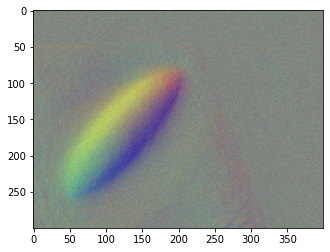

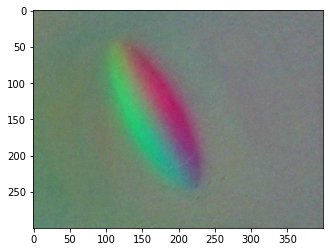

In [19]:
depth_transformed = img_mix[:,:,0] * depth_max
depth_transformed = np.clip(depth_transformed+1, 0, depth_max)
gy, gx = np.gradient(depth_transformed)


# plt.imshow(gx, cmap='gray', vmin=-0.3, vmax=0.3)
# plt.imshow(gy, cmap='gray', vmin=-0.3, vmax=0.3)

rendered_img = np.zeros(frame.shape)
theta_x = np.arctan(gx*5)
theta_y = np.arctan(gy*5)

k = 0.35
rendered_img[:,:,1] = np.cos(np.pi / 2 - theta_x) * k * 1.2
rendered_img[:,:,0] = np.cos(np.pi / 2 + theta_y) * k / 2
rendered_img[:,:,2] = np.cos(np.pi / 2 - theta_y) * k * 1
    
# rendered_img[:,:,1] = np.maximum(rendered_img[:,:,1], 0)
# rendered_img[:,:,2] = np.maximum(rendered_img[:,:,2], 0)
# rendered_img[:,:,0] = np.maximum(rendered_img[:,:,0], 0)
rendered_img[:,:,1] += 0.03

# noise = np.random.normal(0, 0.02, size=diff_img.shape)
noise = np.random.normal(0, 0.03, size=rendered_img.shape)
rendered_img += noise

imshow(rendered_img + 0.5)
plt.figure()
G = np.zeros_like(diff_img) + 0.5
G[:,:,1] = diff_img[:,:,1]
imshow(diff_img)

B = np.zeros_like(diff_img) + 0.5
B[:,:,0] = diff_img[:,:,0]

R = np.zeros_like(diff_img) + 0.5
R[:,:,2] = diff_img[:,:,2]


# plt.imshow(R[:,:,2], cmap='gray')

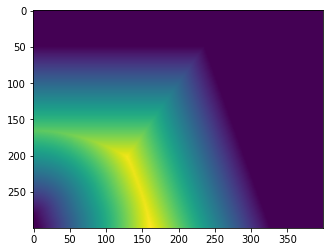

In [17]:
# a = np.array(([0,1,1,1,1],
#                   [0,0,1,1,1],
#                   [0,1,1,1,1],
#                   [0,1,1,1,0],
#                   [0,1,1,0,0]))
mask_raw
from scipy import ndimage


distance = ndimage.distance_transform_edt(1-mask_raw)
plt.imshow(distance)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


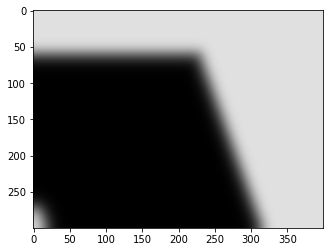

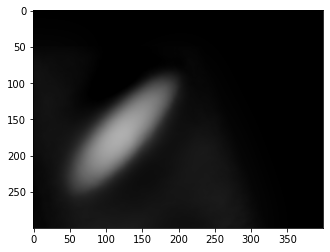

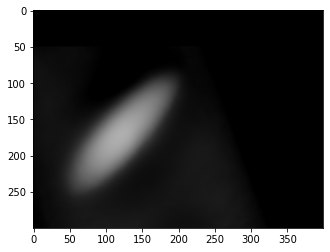

In [18]:
rng = 10
# distance_clip = np.clip(distance, 0, rng) / rng
distance_clip = 1/(1 + np.exp(-(distance - rng) / 5)) 

distance_clip = cv2.GaussianBlur(distance_clip.astype(np.float32), (45,45), 0)
distance_clip = 1 - distance_clip
distance_clip_RGB = np.dstack([distance_clip, distance_clip, distance_clip])

plt.imshow(distance_clip_RGB)

img_mix = distance_clip_RGB * img_interp_blur + (1-distance_clip_RGB) * img_interp
# img_mix = (1-distance_clip_RGB) * img_interp

plt.figure()
plt.imshow(img_mix)
plt.figure()
plt.imshow(shifted)